In [38]:
import cv2
from ultralytics import YOLO
from PIL import Image
from pathlib import Path
import numpy as np
import math
from matplotlib import pyplot as plt

In [3]:
ROOT = Path().resolve().parent

In [4]:
img_path = ROOT / 'images' / 'hornet.jpg'

In [5]:
img = Image.open(img_path)

In [6]:
img_grey = img.convert('L')

In [7]:
# img_mat

In [8]:
old_size = img.size

In [9]:
new_size = (old_size[0] // 16, old_size[1] // 16)

In [10]:
new_size

(81, 55)

In [11]:
img_grey = img_grey.resize(new_size)

In [12]:
img_mat = np.array(img_grey)

In [13]:
img_mat.mean()

np.float64(94.14163860830527)

In [14]:
img_mat_filtered = np.where(img_mat>128,img_mat,0)

In [15]:
img_test = Image.fromarray(img_mat_filtered)

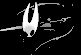

In [16]:
img_test

In [17]:
chars = """$@B%8&WM#*oahkbdpqwmZO0QLCJUYXzcvunxrjft/|()1{}[]?-_+~<>i!lI;:,"^`'."""

In [18]:
len(chars)

68

In [19]:
new_chars = np.array(list(chars[:-4][::-1]))

In [20]:
# new_chars

In [21]:
# len(new_chars)

In [22]:
def get_ascii(x):
    return np.floor((x - 127) / 2 - 1).astype(int)

In [23]:
img_ascii = np.where(img_mat_filtered>=128,new_chars[get_ascii(img_mat_filtered)],'.')

In [24]:
# img_ascii

In [25]:
lines = []
for line in img_ascii:
    line_list = list(line)
    line_list.append(np.str_('\n'))
    # print(line_list)
    new_line = ''.join(line)
    lines.append(new_line)

In [26]:
# lines[0]

In [27]:
with open ('text.txt', 'w', encoding='utf-8') as f:
    for line in lines:
        f.write(line)
        f.write('\n')

In [28]:
# with open ('text.txt', 'w', encoding='utf-8') as f:
#     f.write('test')

In [29]:
img = cv2.imread(img_path)

In [31]:
type(img)

numpy.ndarray

In [37]:
img_test = Image.fromarray(img).convert('rgb')

ValueError: image has wrong mode

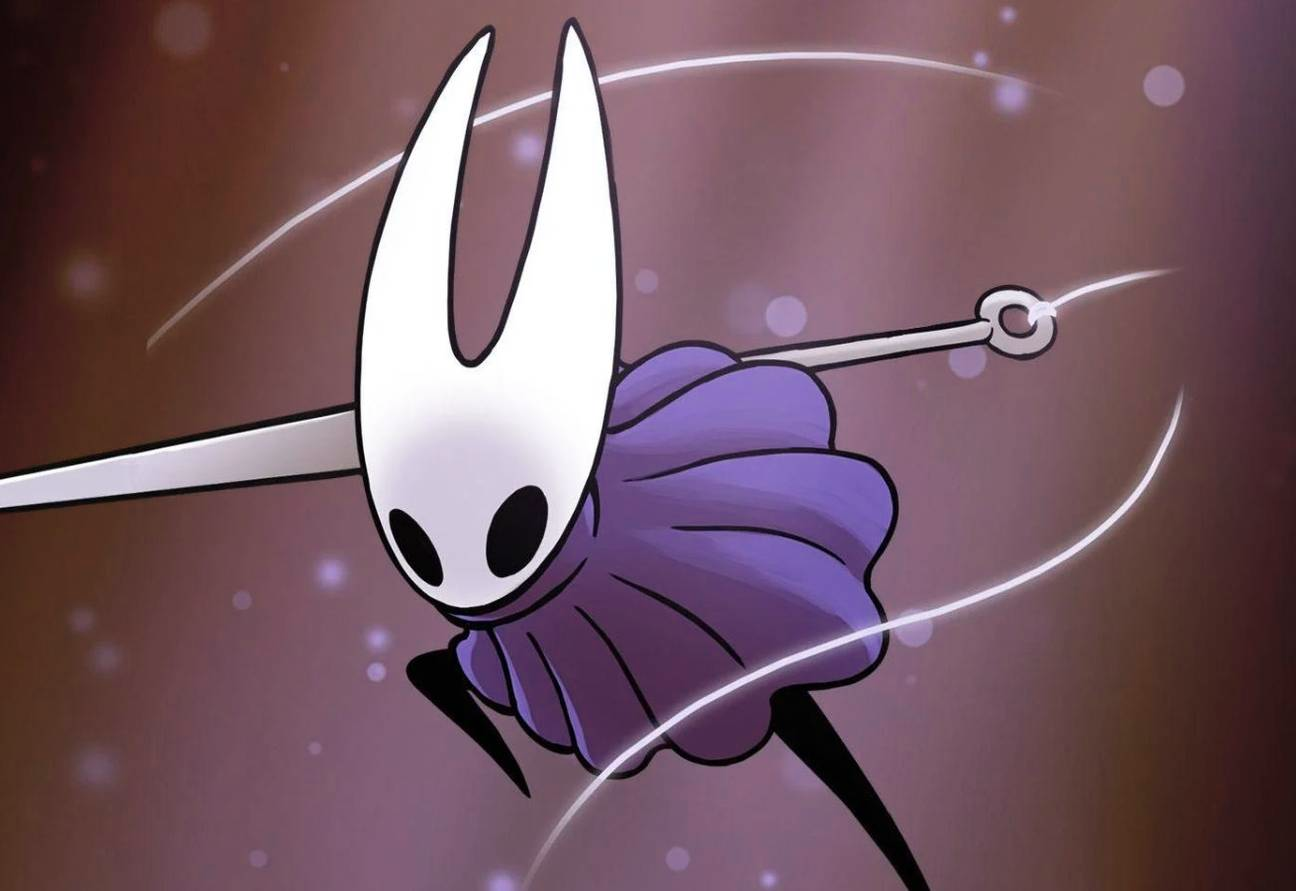

In [33]:
img_test

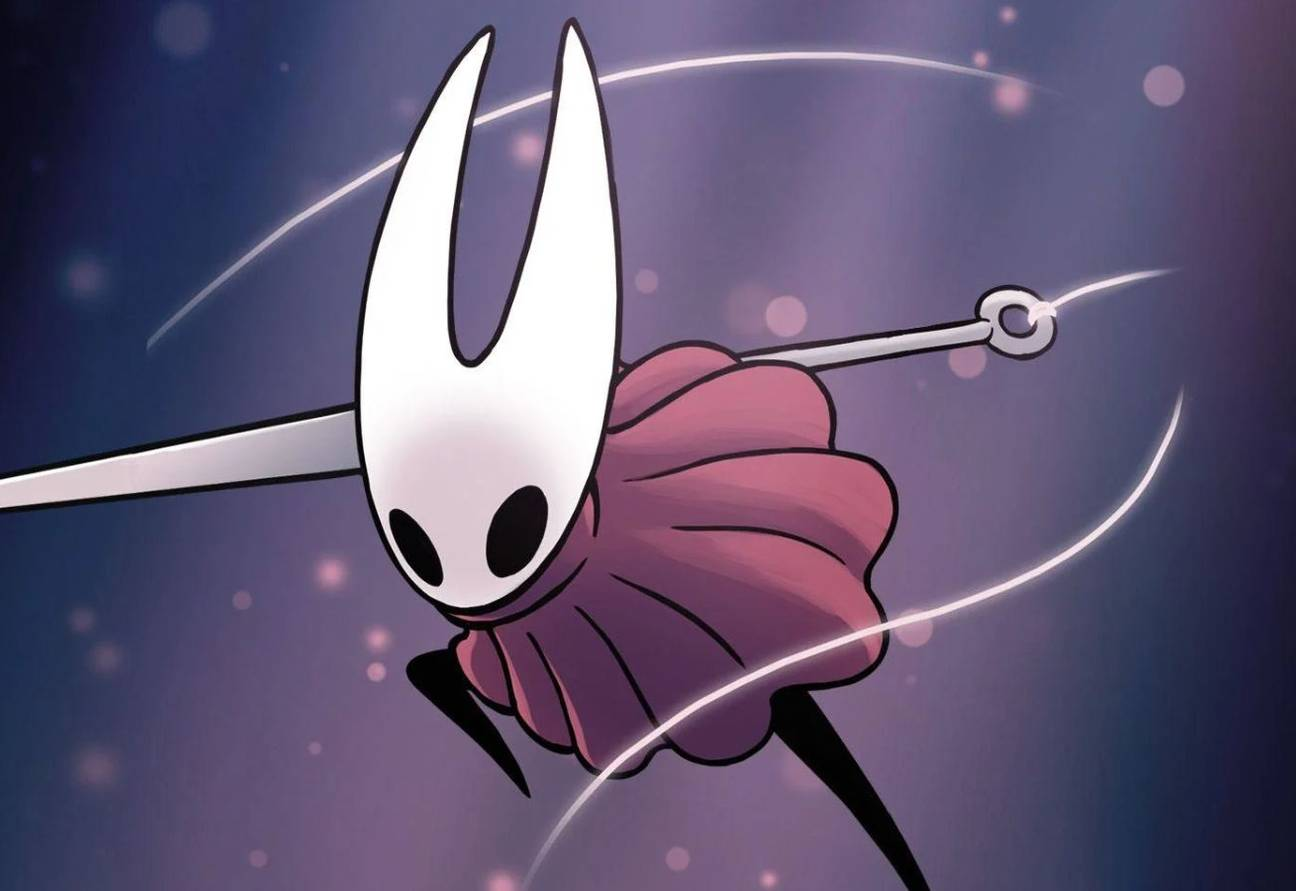

In [34]:
Image.open(img_path)

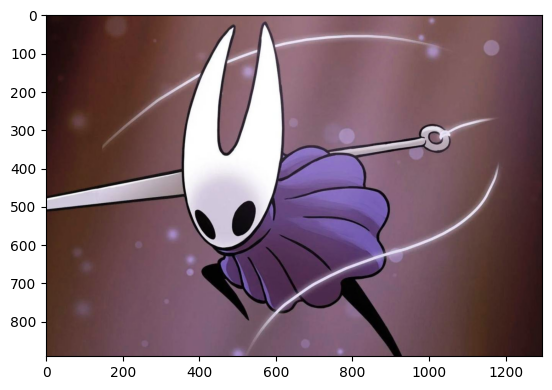

In [40]:
plt.imshow(img_test)
plt.show()

In [45]:
img_test2 = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

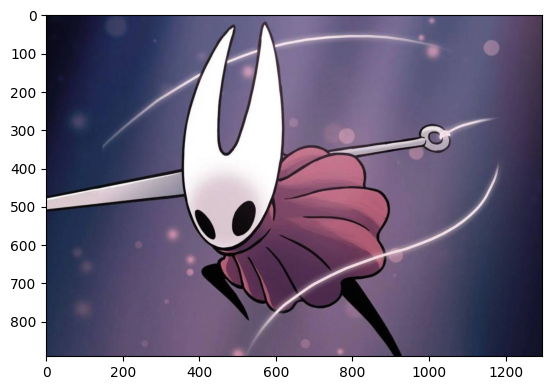

In [46]:
plt.imshow(img_test2)
plt.show()